In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
%matplotlib inline

In [2]:
main_directory = 'D:\\VAWT_data'
cm_dir = main_directory + "\\blade_1_cm_data"
cm_list = os.listdir(cm_dir)
os.chdir(cm_dir)

In [18]:
cm_target = [file for file in cm_list if file.endswith('.csv')]
cm_target = sorted(cm_target, key=lambda s: int(re.search(r'\d+',s).group()))
cm_target = [cm_target[-4],] + cm_target[:-4] + cm_target[-3:]

In [6]:
cm_df = pd.DataFrame()
for i, file in enumerate(cm_target):
    data = pd.read_csv(file, header=None)
    cm_df = pd.concat([cm_df, data], axis=0)

In [54]:
df = pd.read_csv('case15cm_blade1.csv', header=None)

In [55]:
time = df.iloc[:,0].values
cm = df.iloc[:,1].values

In [59]:
time.shape

(24941,)

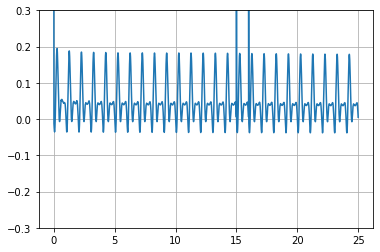

In [56]:
plt.plot(time,cm)
plt.ylim([-0.3,0.3])
plt.grid()

In [76]:
time_beUsed = time[np.where(np.logical_and(time>=10, time<15))]

In [77]:
cm_beUsed = cm[np.where(np.logical_and(time>=10, time<15))]

In [71]:
 time_u = np.unique(time_beUsed)

In [61]:
time_beUsed.shape

(4986,)

In [62]:
time_beUsed[0]

10.001

In [63]:
time_beUsed[-1]

14.999

In [65]:
np.where(time==time_beUsed[-1])

(array([14934], dtype=int64),)

In [66]:
time[14935]

15.0

In [67]:
from scipy import interpolate

In [112]:
linear_func = interpolate.interp1d(time_beUsed,cm_beUsed, bounds_error=False,kind='quadratic', fill_value='extrapolate')

In [99]:
# dup_index = []
for i in range(len(time_beUsed)):
    if time_beUsed[i]==time_beUsed[i-1]:
        time_beUsed[i] += 0.0005

In [114]:
interval = np.arange(10, 15, 0.001)
a=linear_func(interval)

In [116]:
a.shape

(5000,)

In [117]:
interval.shape

(5000,)

In [111]:
a[2]

0.005180600000002038

In [108]:
from collections import Counter

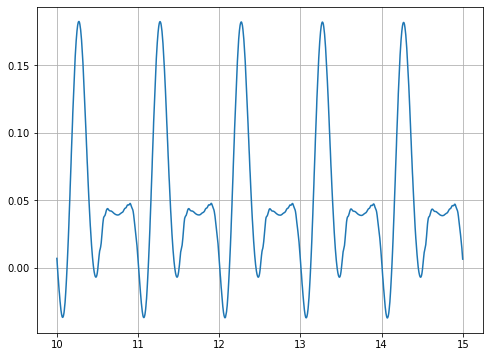

In [121]:
plt.figure(figsize=(8,6))
plt.plot(interval, a)
plt.grid()